In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

In [62]:
df = pd.read_excel("C:\\Users\\Dell\\OneDrive\\Desktop\\STATISTICS\\Data analysis\\Data Tutorials Youtube\\finance domain\\financial_loan.xlsx")

In [63]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [64]:
df.shape

(38576, 24)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   application_type       38576 non-null  object        
 3   emp_length             38576 non-null  object        
 4   emp_title              37138 non-null  object        
 5   grade                  38576 non-null  object        
 6   home_ownership         38576 non-null  object        
 7   issue_date             38576 non-null  datetime64[ns]
 8   last_credit_pull_date  38576 non-null  datetime64[ns]
 9   last_payment_date      38576 non-null  datetime64[ns]
 10  loan_status            38576 non-null  object        
 11  next_payment_date      38576 non-null  datetime64[ns]
 12  member_id              38576 non-null  int64         
 13  p

In [66]:
df.dtypes

id                                int64
address_state                    object
application_type                 object
emp_length                       object
emp_title                        object
grade                            object
home_ownership                   object
issue_date               datetime64[ns]
last_credit_pull_date    datetime64[ns]
last_payment_date        datetime64[ns]
loan_status                      object
next_payment_date        datetime64[ns]
member_id                         int64
purpose                          object
sub_grade                        object
term                             object
verification_status              object
annual_income                   float64
dti                             float64
installment                     float64
int_rate                        float64
loan_amount                       int64
total_acc                         int64
total_payment                     int64
dtype: object

In [67]:
df.isna().sum()

id                          0
address_state               0
application_type            0
emp_length                  0
emp_title                1438
grade                       0
home_ownership              0
issue_date                  0
last_credit_pull_date       0
last_payment_date           0
loan_status                 0
next_payment_date           0
member_id                   0
purpose                     0
sub_grade                   0
term                        0
verification_status         0
annual_income               0
dti                         0
installment                 0
int_rate                    0
loan_amount                 0
total_acc                   0
total_payment               0
dtype: int64

In [68]:
(df['emp_title'].isna().sum())/df.shape[0] * 100

3.7277063459145583

In [69]:
df.describe()

,id,issue_date,last_credit_pull_date,last_payment_date,next_payment_date,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,38576,38576,38576,38576,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,2021-07-16 02:31:35.562007040,2021-06-08 13:36:34.193280512,2021-06-26 09:52:08.909166080,2021-07-26 20:42:20.605557760,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
min,5.473400e+04,2021-01-01 00:00:00,2021-01-08 00:00:00,2021-01-08 00:00:00,2021-02-08 00:00:00,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,2021-04-11 00:00:00,2021-04-15 00:00:00,2021-03-16 00:00:00,2021-04-16 00:00:00,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,2021-07-11 00:00:00,2021-05-16 00:00:00,2021-06-14 00:00:00,2021-07-14 00:00:00,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,2021-10-11 00:00:00,2021-08-13 00:00:00,2021-09-15 00:00:00,2021-10-15 00:00:00,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,2021-12-12 00:00:00,2022-01-20 00:00:00,2021-12-15 00:00:00,2022-01-15 00:00:00,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000
std,2.113246e+05,NaN,NaN,NaN,NaN,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777


### Total Loan Application

In [70]:
total_loan_application = df['id'].count()
total_loan_application

38576

### MTD Total Loan Applications

In [71]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_loan_applications = mtd_data['id'].count()

print(f"MTD Loan Applications (for {latest_issue_date.strftime('%B %Y')}):{mtd_loan_applications}")

MTD Loan Applications (for December 2021):4314


### Total Funded Amount

In [72]:
total_funded_amount = df['loan_amount'].sum()
print(f"Total Funded Amount (in Millions): ${round(total_funded_amount/1000000,3)} M")


Total Funded Amount (in Millions): $435.757 M


### MTD Total Funded Amount

In [73]:
mtd_total_funded_amount = mtd_data['loan_amount'].sum()
print(f"MTD Total Funded Amount (in Millions): ${round(mtd_total_funded_amount/1000000,3)} M")

MTD Total Funded Amount (in Millions): $53.981 M


### Total Amount Recieved

In [74]:
total_amount_recieved = df['total_payment'].sum()
total_amount_recieved_millions = total_amount_recieved/ 1000000
print("Total Amount Recieved: ${:.2f}M". format(total_amount_recieved_millions))

Total Amount Recieved: $473.07M


### MTD Total Amount Recieved

In [75]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_total_amount_recieved = mtd_data['total_payment'].sum()
print(f"MTD Total Amount Recieved(in Millions): ${round(mtd_total_amount_recieved/1000000,3)} M")

MTD Total Amount Recieved(in Millions): $58.074 M


### Average Interest Rate

In [76]:
average_interest_rate = df['int_rate'].mean()*100
print(f"Avg Int Rate: {round(average_interest_rate,3)} %")

Avg Int Rate: 12.049 %


### Average Debt-to-Income Ratio (DTI)

In [77]:
average_dti = df['dti'].mean()*100
print(f"Avg DTI: {round(average_dti,3)} %")

Avg DTI: 13.327 %


### Good Loan Metrics

In [78]:
good_loans = df[df['loan_status'].isin(["Fully Paid", "Current"])]
total_loan_applications = df['id'].count()

good_loan_applications =good_loans['id'].count()
good_loan_funded_amount = good_loans['loan_amount'].sum()
good_loan_recieved = good_loans['total_payment'].sum()

good_loan_funded_amount_millions = good_loan_funded_amount/1000000
good_loan_recieved_millions = good_loan_recieved / 1000000

good_loan_percentage = (good_loan_applications / total_loan_applications)*100

print("Good Loan Application:", good_loan_applications)
print("Good Loan Funded Amount (in Millions): ${:.2f}M".format(good_loan_funded_amount_millions))
print("Good Loan Total Recieved (in Millions): ${:.2f}M".format(good_loan_recieved_millions))
print("Percentage of Good Loan Applications: {:.2f}%".format(good_loan_percentage))

Good Loan Application: 33243
Good Loan Funded Amount (in Millions): $370.22M
Good Loan Total Recieved (in Millions): $435.79M
Percentage of Good Loan Applications: 86.18%


### Bad Loan Metrics

In [79]:
bad_loans = df[df['loan_status'].isin(["Charged Off"])]
total_loan_applications = df['id'].count()

bad_loan_applications = bad_loans['id'].count()
bad_loan_funded_amount = bad_loans['loan_amount'].sum()
bad_loan_recieved = bad_loans['total_payment'].sum()

bad_loan_funded_amount_millions = bad_loan_funded_amount/1000000
bad_loan_recieved_millions = bad_loan_recieved / 1000000

bad_loan_percentage = (bad_loan_applications / total_loan_applications)*100

print("Bad Loan Application:", bad_loan_applications)
print("Bad Loan Funded Amount (in Millions): ${:.2f}M".format(bad_loan_funded_amount_millions))
print("Bad Loan Total Recieved (in Millions): ${:.2f}M".format(bad_loan_recieved_millions))
print("Percentage of Bad Loan Applications: {:.2f}%".format(bad_loan_percentage))

Bad Loan Application: 5333
Bad Loan Funded Amount (in Millions): $65.53M
Bad Loan Total Recieved (in Millions): $37.28M
Percentage of Bad Loan Applications: 13.82%


### Monthly Trends by Issue Date for Total Funded Amount

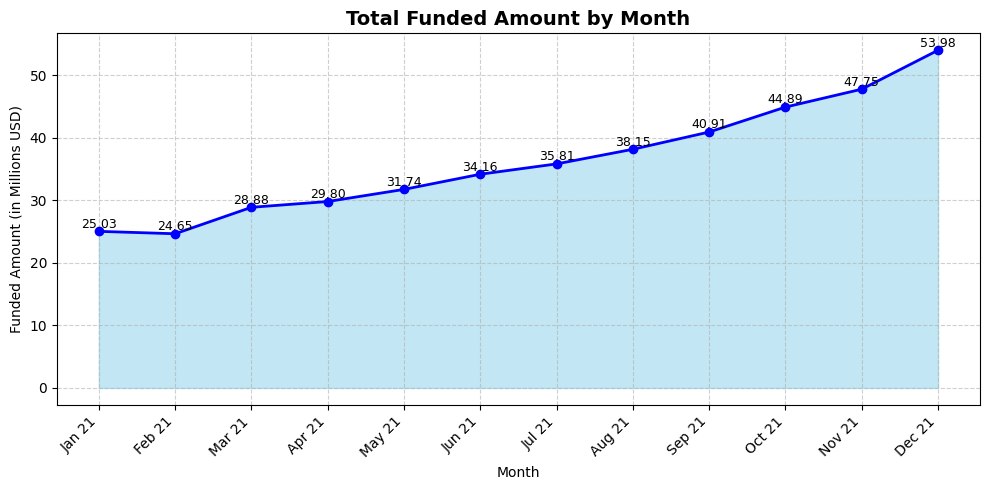

In [80]:
# Calculate monthly funded amounts
monthly_funded = (
    df.sort_values('issue_date')
    .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %y'))
    .groupby('month_name', sort=False)['loan_amount']
    .sum()
    .div(1000000)
    .reset_index(name='loan_amount_millions')
)

# Create the plot
plt.figure(figsize=(10, 5))

# Fill between for area chart
plt.fill_between(
    range(len(monthly_funded)), 
    monthly_funded['loan_amount_millions'], 
    color='skyblue', 
    alpha=0.5
)

# Line plot on top
plt.plot(
    range(len(monthly_funded)), 
    monthly_funded['loan_amount_millions'], 
    color='blue', 
    linewidth=2,  # Fixed typo: was 'linewidthe'
    marker='o'
)

# Add data labels
for i, row in monthly_funded.iterrows():
    plt.text(
        i, 
        row['loan_amount_millions'] + 0.1,  # Slightly above the point
        f"{row['loan_amount_millions']:.2f}", 
        ha='center', 
        va='bottom', 
        fontsize=9, 
        rotation=0, 
        color='black'
    )

# Titles and labels
plt.title('Total Funded Amount by Month', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Funded Amount (in Millions USD)')

# Set x-ticks
plt.xticks(
    ticks=range(len(monthly_funded)), 
    labels=monthly_funded['month_name'], 
    rotation=45,
    ha='right'
)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Monthly Trends by Issue Date for Total Amount Receieved

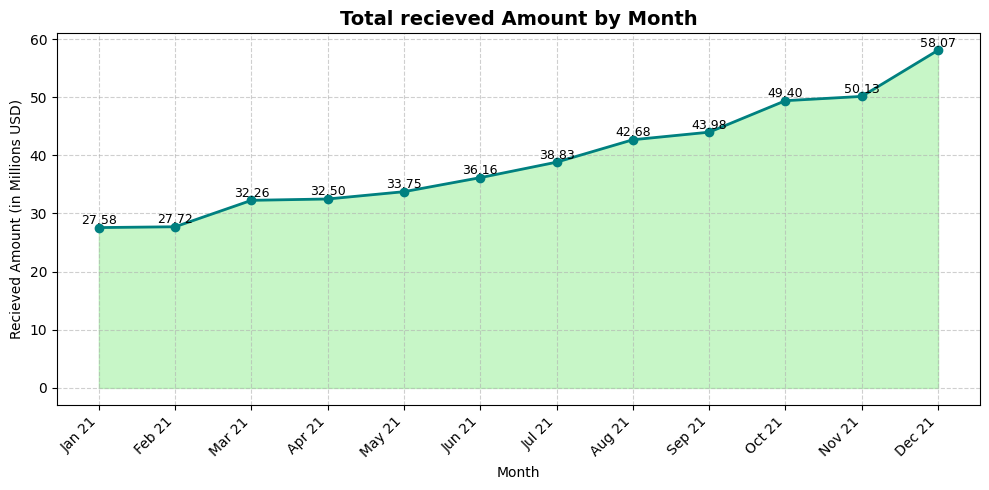

In [81]:
# Calculate monthly funded amounts
monthly_recieved = (
    df.sort_values('issue_date')
    .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %y'))
    .groupby('month_name', sort=False)['total_payment']
    .sum()
    .div(1000000)
    .reset_index(name='recieved_amount_millions')
)

# Create the plot
plt.figure(figsize=(10, 5))

# Fill between for area chart
plt.fill_between(
    range(len(monthly_recieved)), 
    monthly_recieved['recieved_amount_millions'], 
    color='lightgreen', 
    alpha=0.5
)

# Line plot on top
plt.plot(
    range(len(monthly_recieved)), 
    monthly_recieved['recieved_amount_millions'], 
    color='teal', 
    linewidth=2,  # Fixed typo: was 'linewidthe'
    marker='o'
)

# Add data labels
for i, row in monthly_recieved.iterrows():
    plt.text(
        i, 
        row['recieved_amount_millions'] + 0.1,  # Slightly above the point
        f"{row['recieved_amount_millions']:.2f}", 
        ha='center', 
        va='bottom', 
        fontsize=9, 
        rotation=0, 
        color='black'
    )

# Titles and labels
plt.title('Total recieved Amount by Month', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Recieved Amount (in Millions USD)')

# Set x-ticks
plt.xticks(
    ticks=range(len(monthly_recieved)), 
    labels=monthly_recieved['month_name'], 
    rotation=45,
    ha='right'
)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Monthly Trends by Issue Date for Total Loan Applications

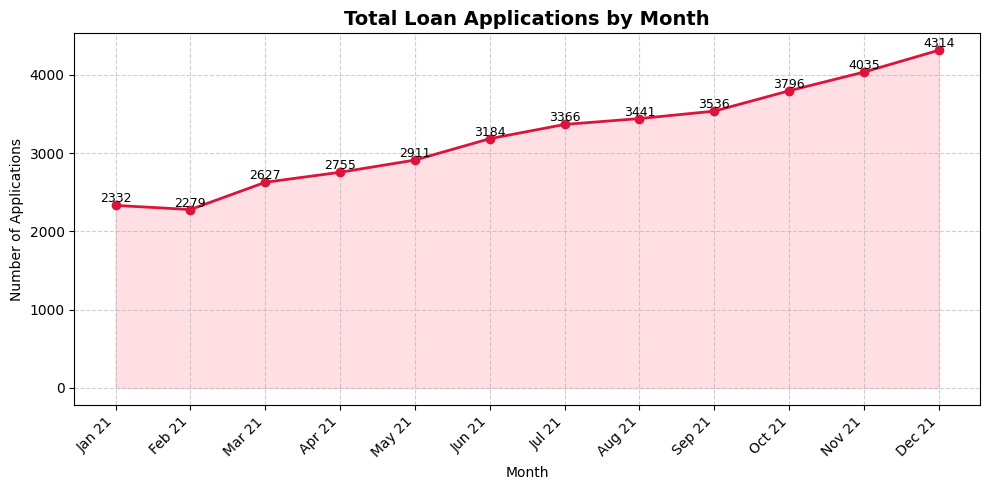

In [82]:
monthly_applications = (
    df.sort_values('issue_date')
    .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %y'))
    .groupby('month_name', sort=False)['id']
    .count()
    .reset_index(name='loan_applications_count')
)

# Create the plot
plt.figure(figsize=(10, 5))

# Fill between for area chart - FIXED: swapped x and y parameters
plt.fill_between(
    x=range(len(monthly_applications)), 
    y1=monthly_applications['loan_applications_count'],  # Changed from 'month_name'
    color='pink', 
    alpha=0.5
)

# Line plot on top
plt.plot(
    range(len(monthly_applications)), 
    monthly_applications['loan_applications_count'],  # Fixed column name
    color='crimson', 
    linewidth=2,
    marker='o'
)

# Add data labels
for i, row in monthly_applications.iterrows():
    plt.text(
        i, 
        row['loan_applications_count'] + 0.1,  # Slightly above the point
        f"{row['loan_applications_count']:.0f}",  # Changed to integer format
        ha='center', 
        va='bottom', 
        fontsize=9, 
        rotation=0, 
        color='black'
    )

# Titles and labels
plt.title('Total Loan Applications by Month', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Applications')

# Set x-ticks 
plt.xticks(
    ticks=range(len(monthly_applications)), 
    labels=monthly_applications['month_name'], 
    rotation=45,
    ha='right'
)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Regional Analysis by State for Total Funded Amount

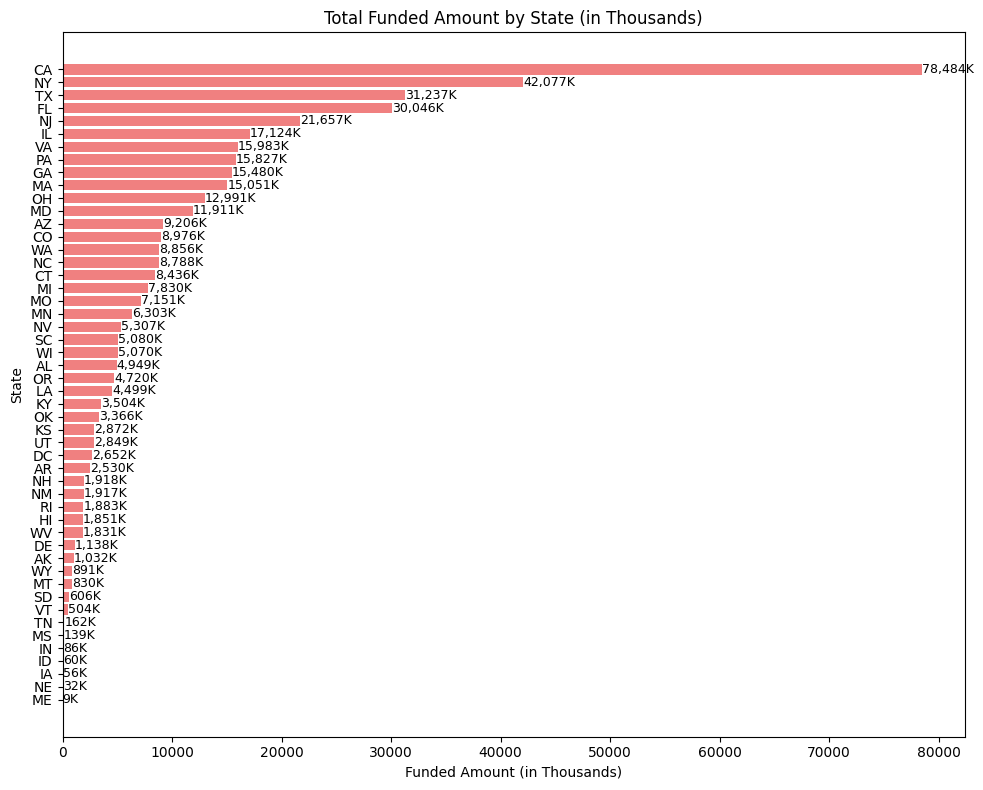

In [83]:
state_funding = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending = True)
state_funding_thousands = state_funding / 1000

plt.figure(figsize=(10,8))
bars = plt.barh(state_funding_thousands.index, state_funding_thousands.values, color='lightcoral')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2,
    f'{width:,.0f}K', va = 'center', fontsize=9)

plt.title('Total Funded Amount by State (in Thousands)')
plt.xlabel('Funded Amount (in Thousands)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

### Loan Term Analysis by Total Funded Amount

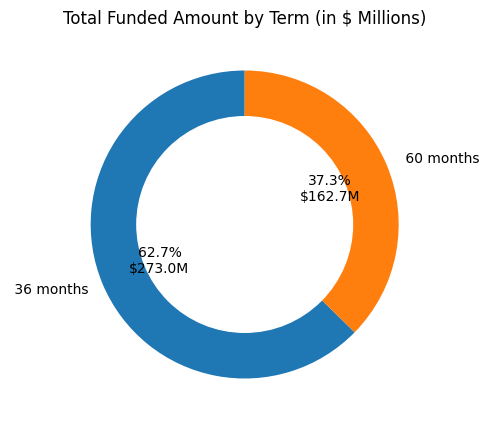

In [84]:
term_funding_millions = df.groupby('term')['loan_amount'].sum()/1000000

plt.figure(figsize=(5,5))
plt.pie(
    term_funding_millions,
    labels=term_funding_millions.index,
    autopct=lambda p: f"{p:.1f}%\n${p*sum(term_funding_millions)/100:.1f}M",
    startangle=90,
wedgeprops={'width':0.5}
)

plt.gca().add_artist(plt.Circle((0,0), 0.7, color='white'))
plt.title("Total Funded Amount by Term (in $ Millions)")
plt.show()

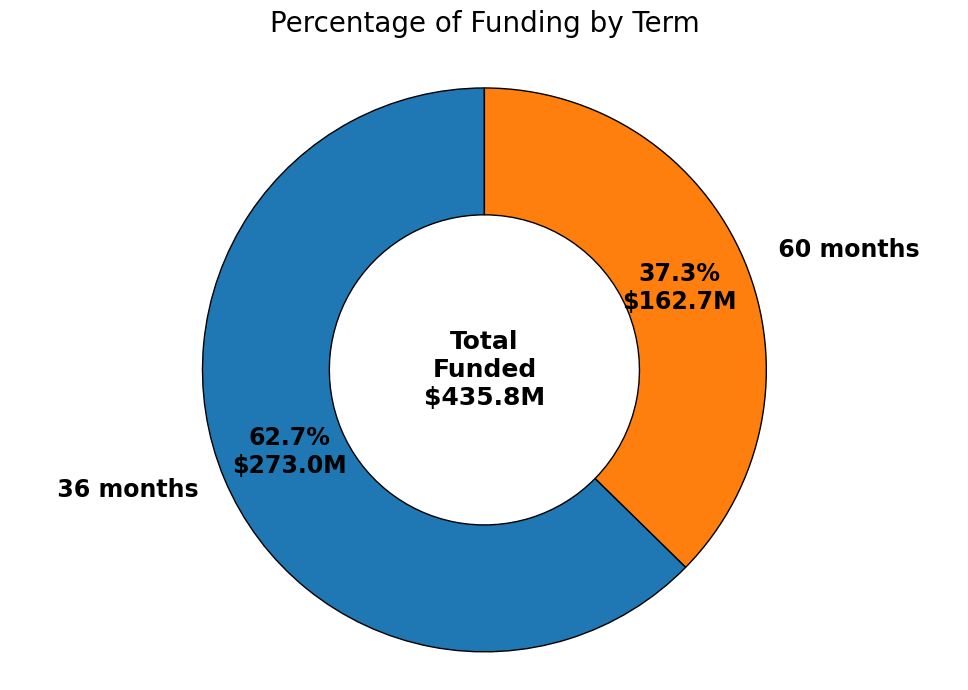

In [85]:
term_funding_millions = df.groupby('term')['loan_amount'].sum() / 1000000
term_pct = term_funding_millions / term_funding_millions.sum() * 100

plt.figure(figsize=(10, 7))  

# Custom autopct function to show both percentage and dollar amount
def custom_autopct(pct):
    # pct is the percentage (e.g., 25.5 for 25.5%)
    dollars = (pct/100) * term_funding_millions.sum()
    return f'{pct:.1f}%\n${dollars:.1f}M'

plt.pie(
    term_pct,
    labels=term_pct.index,
    autopct=custom_autopct,
    startangle=90,
    wedgeprops={'width': 0.45, 'edgecolor': 'black'},  # donut + border
    textprops={'fontsize': 17, 'fontweight': 'bold'},  # Slightly smaller font for more text
    pctdistance=0.75,           # Adjust for more text
    labeldistance=1.1           # move term names a bit outside
)

plt.title("Percentage of Funding by Term", fontsize=20, pad=20)
plt.axis('equal')  # makes sure pie is perfectly round

# Add total amount in the center
total_amount = f"${term_funding_millions.sum():,.1f}M"
plt.text(0, 0, f"Total\nFunded\n{total_amount}", 
         ha='center', va='center', fontsize=18, fontweight='bold')

plt.tight_layout()
plt.show()

### Employee Length by Total Funded Amount

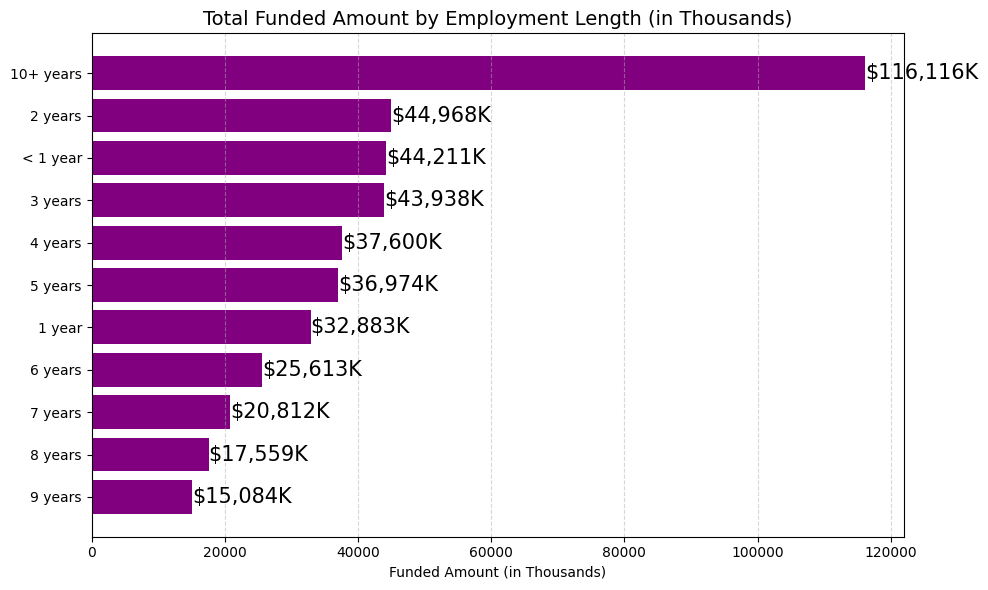

In [86]:
emp_funding_thousands = df.groupby('emp_length')['loan_amount'].sum().sort_values()/1000

plt.figure(figsize=(10,6))
bars= plt.barh(emp_funding_thousands.index, emp_funding_thousands.values, color='purple')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() +bar.get_height()/2,
    f"${width:,.0f}K", va='center', fontsize=15)

plt.xlabel("Funded Amount (in Thousands)")
plt.title("Total Funded Amount by Employment Length (in Thousands)", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Loan Purpose by Total Funded Amount

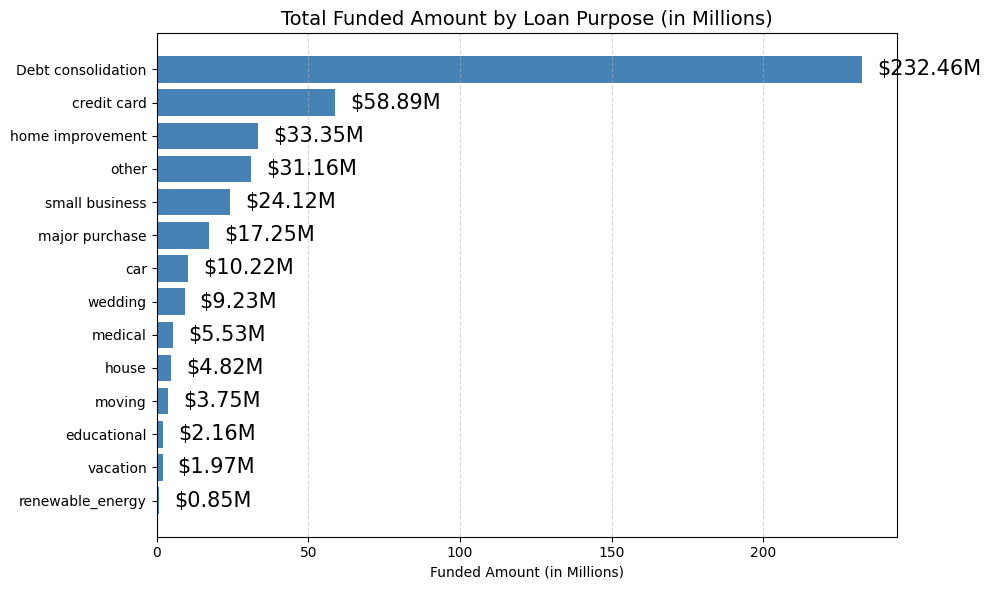

In [87]:
purpose_funding_millions = df.groupby('purpose')['loan_amount'].sum().sort_values()/1000000

plt.figure(figsize=(10,6))
bars= plt.barh(purpose_funding_millions.index, purpose_funding_millions.values, color='steelblue')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() +bar.get_height()/2,
    f"${width:,.2f}M", va='center', fontsize=15)

plt.xlabel("Funded Amount (in Millions)")
plt.title("Total Funded Amount by Loan Purpose (in Millions)", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Home Ownership by Total Funded Amount

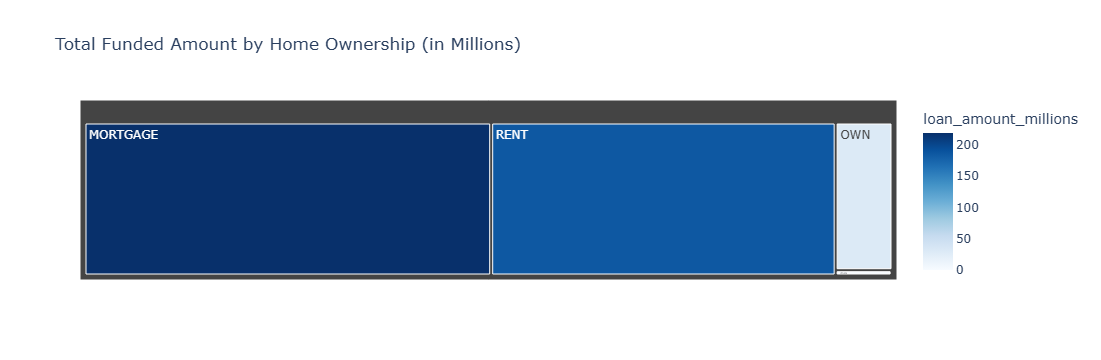

In [89]:
home_funding = df.groupby('home_ownership')['loan_amount'].sum().reset_index()
home_funding['loan_amount_millions'] = home_funding['loan_amount']/1000000

fig= px.treemap(
    home_funding,
    path=['home_ownership'],
    values='loan_amount_millions',
    color='loan_amount_millions',
    color_continuous_scale='Blues',
    title='Total Funded Amount by Home Ownership (in Millions)'
)

fig.show()